# Import Dataset

In [2]:
#import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import time
%matplotlib inline

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
data = pd.read_csv('OnlineRetail.csv')
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55    17850.00  United Kingdom  
1  12/1/2010 8:26       3.39    17850.00  United Kingdom  
2  12/1/2010 8:26       2.75    17850.00  United Kingdom  
3  12/1/2010 8:26       3.39    17850.00  United Kingdom  
4  12/1/2010 8:26       3.39    17850.00  United Kingdom

# **TO-DO:** Data Preprocessing

In [5]:
# **TO-DO** Print the number of duplicate items
print("Number of duplicate rows:", data.duplicated().sum())

Number of duplicate rows: 5268


## **TO-DO:** Remove Duplicate items from dataset

In [7]:
# **TO-DO** Remove duplicate items from the dataset
data = data.drop_duplicates()

## **TO-DO:** Check for missing values

In [9]:
# **TO-DO** Display count of missing values
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


## **TO-DO:** Create new Invoice List

In [11]:
# **TO-DO** Creates a list of unique invoice No. with Null Customer ID
invoice_list = data[data['CustomerID'].isnull()]['InvoiceNo'].unique().tolist()

In [12]:
print("InvoiceLise: ", invoice_list[:10])
print("Invoice Size:", len(invoice_list))

InvoiceLise:  ['536414', '536544', '536545', '536546', '536547', '536549', '536550', '536552', '536553', '536554']
Invoice Size: 3710


## **TO-DO:** Removing Inconsistent Records

In [14]:
# **TO-DO** Checking the number of records with Quantity Negative and Prices 0 or Vice versa
condition1 = ((data['Quantity'] < 0) & (data['UnitPrice'] == 0)) | ((data['Quantity'] == 0) & (data['UnitPrice'] < 0))
print("The number of records with Quantity Negative and Prices 0 or Vice versa : ", condition1.sum())

# **TO-DO** Checking if Negative quantities are cancelled items
cancelled_prefix = data[data['InvoiceNo'].astype(str).str.startswith('C')]['InvoiceNo'].astype(str).str[0].unique().tolist()
print("Cancelled Items have Invoice Starting with : ", cancelled_prefix)
# **TO-DO** Checking for Records with Negative Unit Price
negative_price_count = (data['UnitPrice'] < 0).sum()
print("The number of transactions with Negative Unit Price : ", negative_price_count)

# **TO-DO** Checking for Records with Unit Price 0
valid_zero_price = data[
    (data['UnitPrice'] == 0) &
    (data['Quantity'] > 0) &
    (~data['InvoiceNo'].astype(str).str.startswith('C')) &
    (data['CustomerID'].notnull())
]
print("The number of transactions with Unit Price 0 : ", len(valid_zero_price))


The number of records with Quantity Negative and Prices 0 or Vice versa :  1336
Cancelled Items have Invoice Starting with :  ['C']
The number of transactions with Negative Unit Price :  2
The number of transactions with Unit Price 0 :  40


In [15]:
# **TO-DO** Removing records with Null Customer ID
data = data[data['CustomerID'].notnull()]

In [16]:
# Copy the dataset and convert CustomerID to int
rfm_train = data.copy()
rfm_train.CustomerID = (rfm_train.CustomerID).astype(int)

In [17]:
# **TO-DO** Count the number of missing values
print("Count of Missing values:")
print(rfm_train.isnull().sum())

Count of Missing values:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


## Cancelled Items


In [19]:
## remove transactions with Cancelled Items.
placed = rfm_train[~rfm_train.InvoiceNo.str.contains('C',na=False)]

In [20]:
placed['TotalCost'] = rfm_train.Quantity * rfm_train.UnitPrice

/var/folders/xb/2tg9ddl94wl284px7ngj8hn40000gn/T/ipykernel_20245/140923902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  placed['TotalCost'] = rfm_train.Quantity * rfm_train.UnitPrice


In [21]:
placed.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  TotalCost  
0  12/1/2010 8:26       2.55       17850  United Kingdom      15.30  
1  12/1/2010 8:26       3.39       17850  United Kingdom      20.34  
2  12/1/2010 8:26       2.75       17850  United Kingdom      22.00  
3  12/1/2010 8:26       3.39       17850  United Kingdom      20.34  
4  12/1/2010 8:26       3.39       17850  United Kingdom      20.34

# **TO-DO:** Exploratory Data Analysis

In [23]:
# **TO-DO** Find The Time Period of Transactions
print("Oldest date is:" + str(placed['InvoiceDate'].min()))
print("\nLatest date is:" + str(placed['InvoiceDate'].max()))

Oldest date is:1/10/2011 10:32

Latest date is:9/9/2011 9:52


## **TO-DO:** Order Density in Different Countries

In [25]:
# **TO-DO** Display the proportion of order based on country as below
proportion = placed['Country'].value_counts(normalize=True).head(12) * 100
proportion = proportion.round(1).astype(str) + '%'
proportion = proportion.reset_index()
proportion.columns = ['Country', 'proportion']
proportion.set_index('Country', inplace=True)
proportion

proportion
Country                  
United Kingdom      88.9%
Germany              2.3%
France               2.1%
EIRE                 1.8%
Spain                0.6%
Netherlands          0.6%
Belgium              0.5%
Switzerland          0.5%
Portugal             0.4%
Australia            0.3%
Norway               0.3%
Italy                0.2%

/var/folders/xb/2tg9ddl94wl284px7ngj8hn40000gn/T/ipykernel_20245/112687938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  placed['InvoiceDate'] = pd.to_datetime(placed['InvoiceDate'], errors='coerce')
/var/folders/xb/2tg9ddl94wl284px7ngj8hn40000gn/T/ipykernel_20245/112687938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  placed['Year'] = placed['InvoiceDate'].dt.year


<Axes: xlabel='Year'>

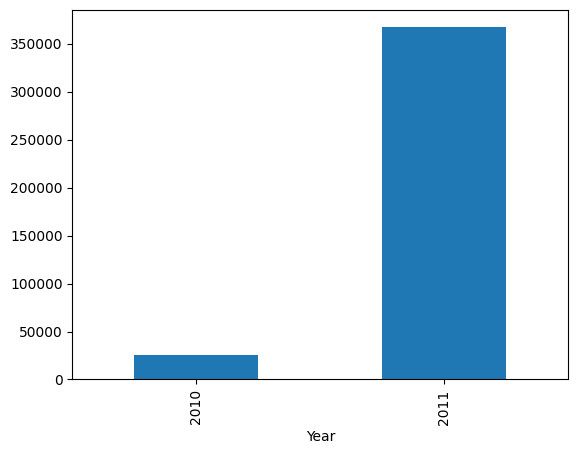

In [26]:
# **TO-DO** Produce the following Bar Graph Below comparing the number invoices by year
placed['InvoiceDate'] = pd.to_datetime(placed['InvoiceDate'], errors='coerce')

placed['Year'] = placed['InvoiceDate'].dt.year

placed['Year'].value_counts().sort_index().plot(kind='bar')

/var/folders/xb/2tg9ddl94wl284px7ngj8hn40000gn/T/ipykernel_20245/1578999889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  placed_2011['Month'] = placed_2011['InvoiceDate'].dt.month


<Axes: xlabel='Month'>

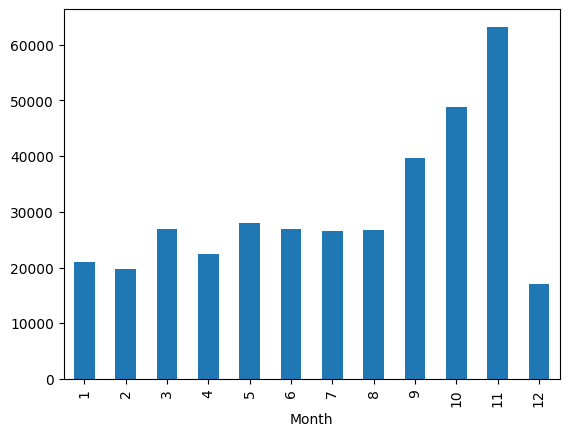

In [27]:
# **TO-DO** Produce the following Bar Graph Below comparing the number invoices by month in 2011
placed_2011 = placed[placed['InvoiceDate'].dt.year == 2011]
placed_2011['Month'] = placed_2011['InvoiceDate'].dt.month
placed_2011['Month'].value_counts().sort_index().plot(kind='bar')

## **Monthly Gross**

Text(0, 0.5, 'Monthly Gross')

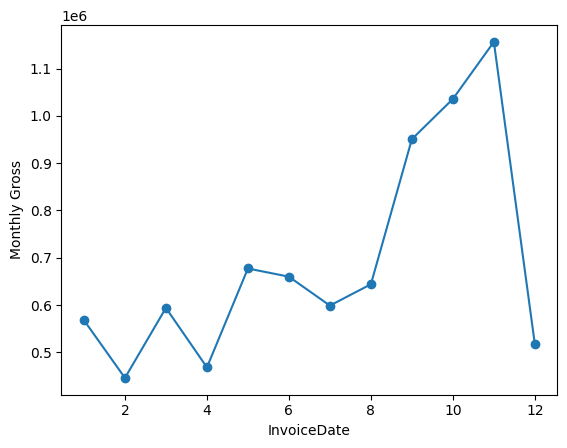

In [29]:
# **TO-DO** Produce the following Bar Graph Below comparing the monthly gross rate in 2011
placed_2011 = placed[placed['InvoiceDate'].dt.year == 2011]
monthly_gross = placed_2011.groupby(placed_2011['InvoiceDate'].dt.month)['TotalCost'].sum()
monthly_gross.plot(marker='o', linestyle='-')
plt.ylabel('Monthly Gross')

<Axes: ylabel='UnitPrice'>

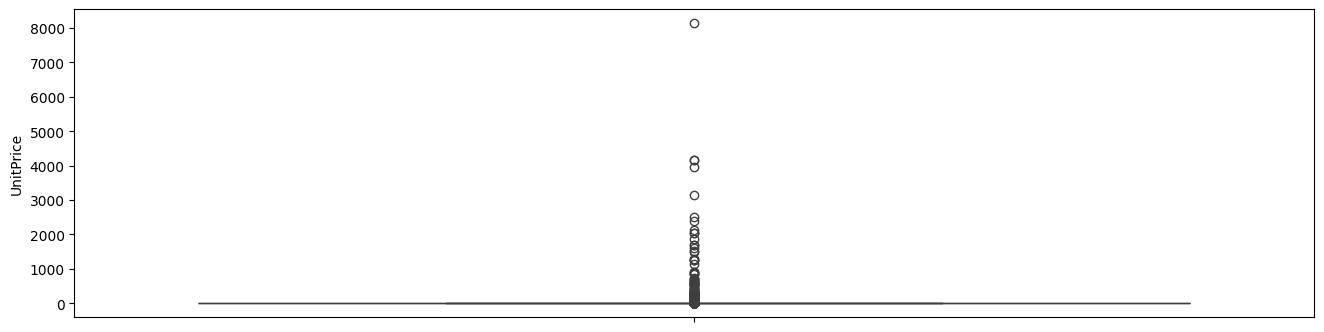

In [30]:
plt.figure(figsize=(16,4))
sns.boxplot(y='UnitPrice',data = placed,orient=("Horizontal", "y"))

Unit Price is more concentrated in lower values of prices.

## **Top Selling Products**

In [33]:
placed.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalCost  Year  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom      15.30  2010  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom      20.34  2010  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom      22.00  2010  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom      20.34  2010  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom      20.34  2010

Text(0, 0.5, 'Description')

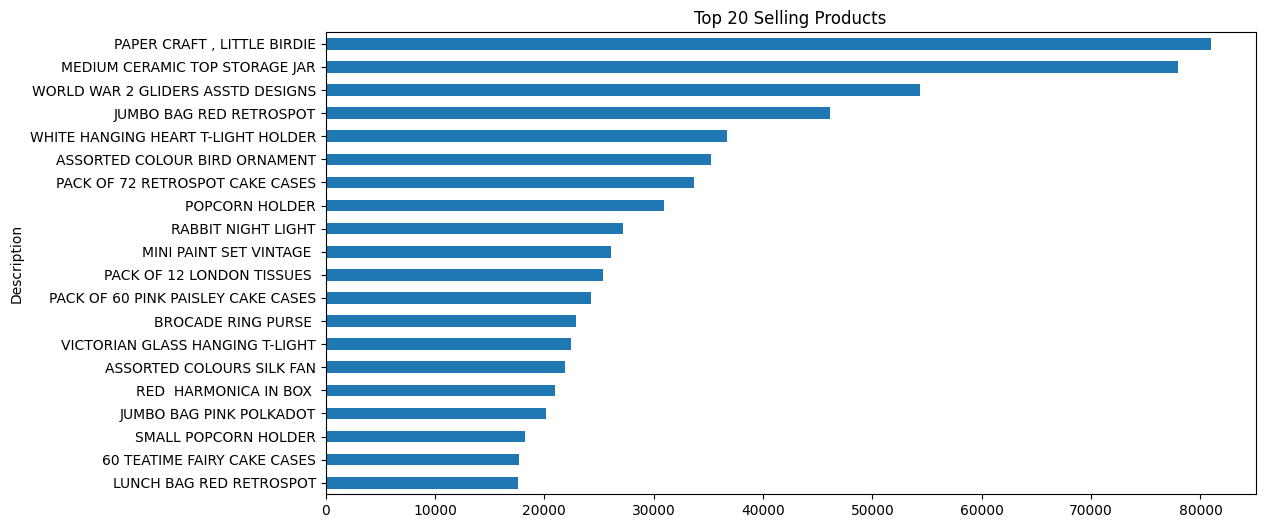

In [34]:
# **TO-DO** Produce the following Graph displaying the top 20 selling products
top_products = placed.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(20)

top_products.iloc[::-1].plot(kind='barh', figsize=(12, 6), title='Top 20 Selling Products')
plt.ylabel('Description')

# **TO-DO:** Receny, Frequency, Montary (RFM) ANALYSIS               

## **TO-DO:** Recency

In [37]:
# **TO-DO** Print Lastest date in the Order History
cutoff = pd.to_datetime('2011-09-09 09:52')

placed = placed[placed['InvoiceDate'] <= cutoff]

print(placed['InvoiceDate'].max().strftime('%-m/%-d/%Y %-H:%M'))

9/9/2011 9:52


In [38]:
current_date = dt.date(2011,12,10)

In [39]:
rfm_train['InvoiceDate'] = pd.to_datetime(rfm_train['InvoiceDate'], errors='coerce')
rfm_train['Purchase_Date'] = rfm_train.InvoiceDate.dt.date
print(rfm_train['Purchase_Date'])

0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541904    2011-12-09
541905    2011-12-09
541906    2011-12-09
541907    2011-12-09
541908    2011-12-09
Name: Purchase_Date, Length: 401604, dtype: object


**TO-DO** Create Seperate Column for Recency

In [41]:
recency = rfm_train.groupby('CustomerID')['Purchase_Date'].max().reset_index()

In [42]:
# **TO-DO** Calculate Recency based on purchase date and current date
recency['Recency'] = (current_date - recency['Purchase_Date']).apply(lambda x: x.days)
recency['Current_Date'] = current_date
recency = recency[['CustomerID', 'Purchase_Date', 'Current_Date', 'Recency']]

# Display Recency
recency.head()

CustomerID Purchase_Date Current_Date  Recency
0       12346    2011-01-18   2011-12-10      326
1       12347    2011-12-07   2011-12-10        3
2       12348    2011-09-25   2011-12-10       76
3       12349    2011-11-21   2011-12-10       19
4       12350    2011-02-02   2011-12-10      311

In [43]:
# **TO-DO** Drop Date Columns which are not useful anymore.
recency = recency.drop(columns=['Purchase_Date', 'Current_Date'])

recency.head()

CustomerID  Recency
0       12346      326
1       12347        3
2       12348       76
3       12349       19
4       12350      311

**TO-DO** Create Seperate Column for Frequency

In [45]:
# **TO-DO** Calculate Frequency based on Customer ID
frequency = rfm_train.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

frequency.head()

CustomerID  InvoiceNo
0       12346          2
1       12347          7
2       12348          4
3       12349          1
4       12350          1

**TO-DO** Create seperate Column for Monetary

In [47]:
# **TO-DO** Calculate Total Cost (Quantity * Price)
rfm_train['TotalCost'] = rfm_train['Quantity'] * rfm_train['UnitPrice']

rfm_train.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country Purchase_Date  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom    2010-12-01   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom    2010-12-01   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom    2010-12-01   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom    2010-12-01   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom    2010-12-01   

   TotalCost  
0      15.30  
1      20.34  
2      22.00  
3      20.34  
4      20.34

In [48]:
# **TO-DO** Calculate Monetary based on total cost per Customer
monetary = rfm_train.groupby('CustomerID')['TotalCost'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']

monetary.head()

CustomerID  Monetary
0       12346      0.00
1       12347   4310.00
2       12348   1797.24
3       12349   1757.55
4       12350    334.40

## **TO-DO:** Combine Recency, Frequency and Monetary

In [50]:
# **TO-DO** Combine Recency, Frequency and Monetary into a single table
rfm_table = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')
rfm_table.set_index('CustomerID', inplace=True)

rfm_table.head()

Recency  InvoiceNo  Monetary
CustomerID                              
12346           326          2      0.00
12347             3          7   4310.00
12348            76          4   1797.24
12349            19          1   1757.55
12350           311          1    334.40

## **TO-DO:** QQ Plot

In [52]:
from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox

def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

A Quantile-Quantile (QQ) plot is a graphical tool to assess if a dataset follows a specified distribution, typically the normal distribution. It does this by plotting the quantiles of the dataset against the quantiles of the theoretical distribution. If the points roughly follow a straight line, the data is approximately normally distributed.
Key Components of a QQ Plot

How to Interpret a QQ Plot

    Straight Line: If the points form a roughly straight line, the data follows the theoretical distribution.
    S-shaped Curve: If the points form an S-shape, the data may have heavier tails than the theoretical distribution.
    Convex/Concave Curve: Indicates a skewness in the data.

/var/folders/xb/2tg9ddl94wl284px7ngj8hn40000gn/T/ipykernel_20245/1895157362.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm)


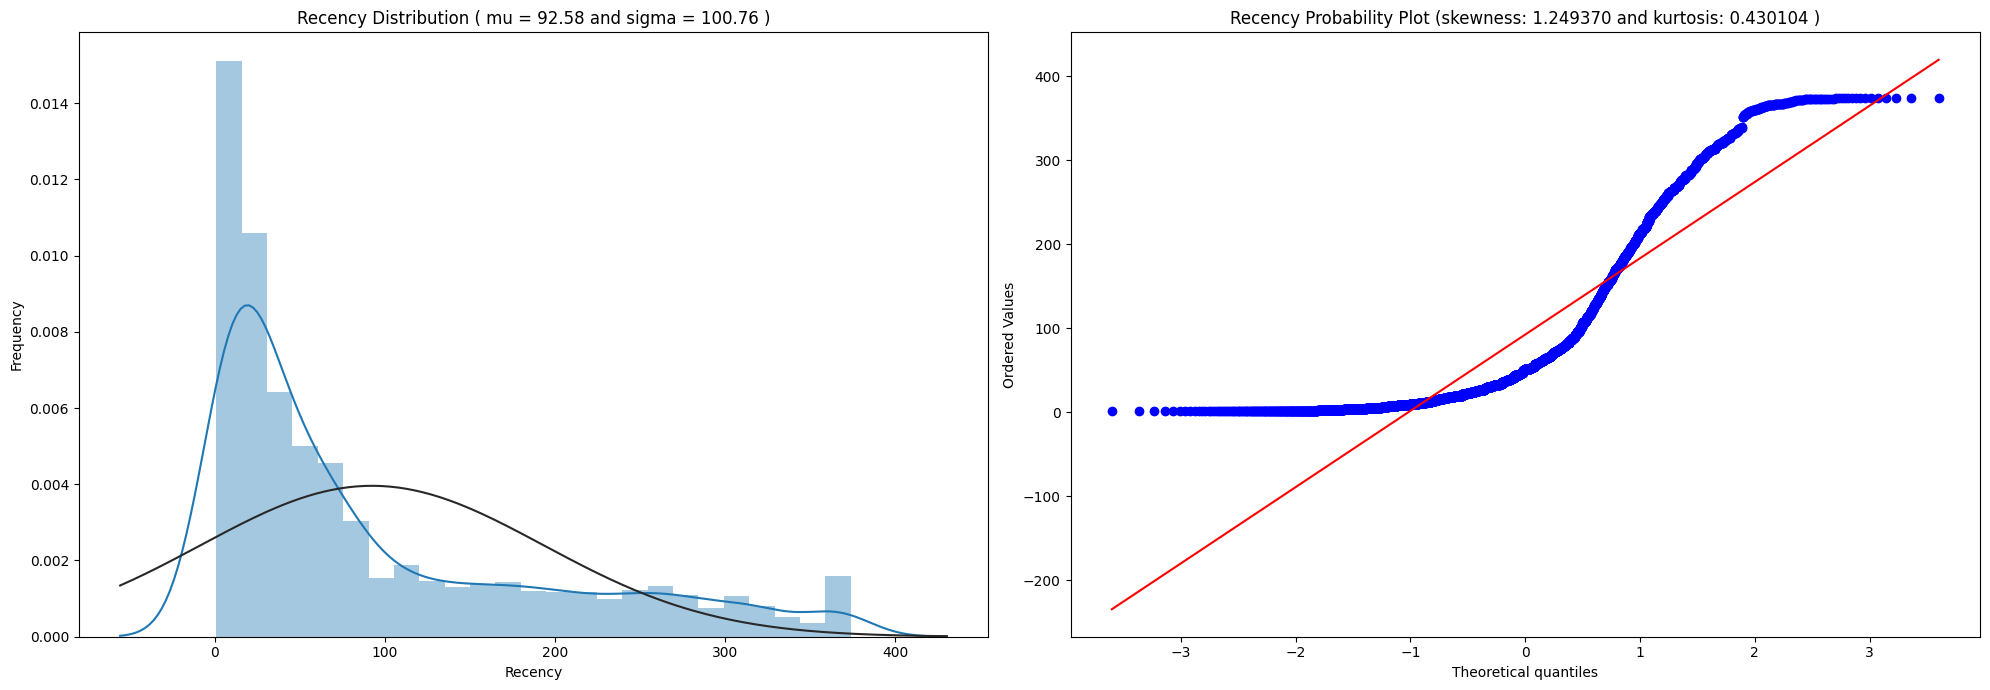

In [54]:
# **TO-DO** Generate the below Recency graphs using the QQ_plot function
QQ_plot(rfm_table['Recency'], 'Recency')

/var/folders/xb/2tg9ddl94wl284px7ngj8hn40000gn/T/ipykernel_20245/1895157362.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm)


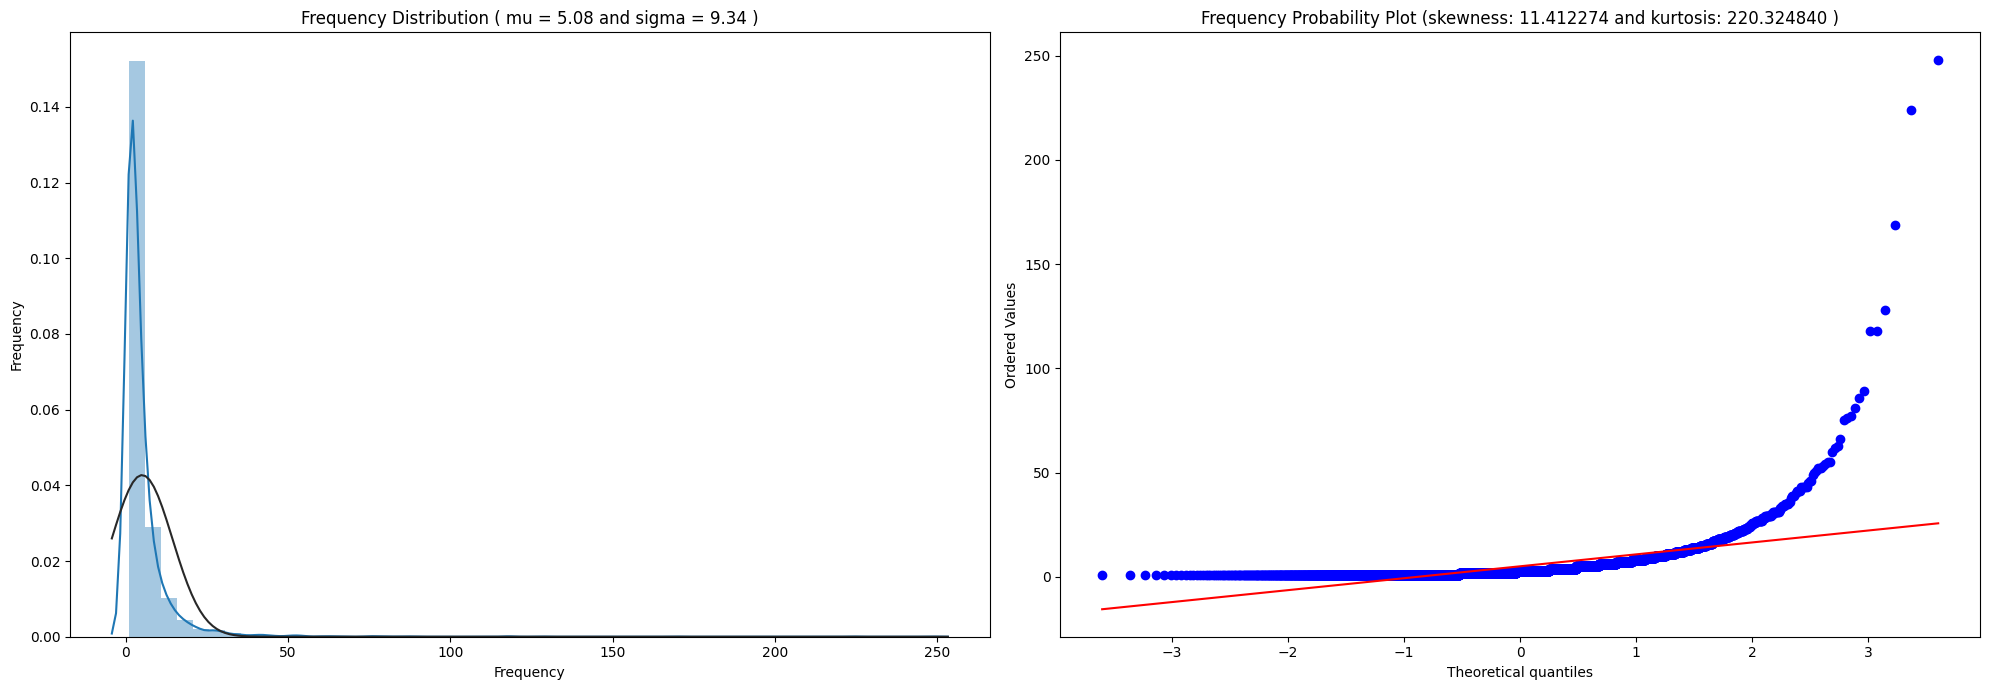

In [55]:
# **TO-DO** Generate the below Frequency graphs using the QQ_plot function
frequency.columns = ['CustomerID', 'Frequency']
rfm_table = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')
QQ_plot(rfm_table['Frequency'], 'Frequency')

/var/folders/xb/2tg9ddl94wl284px7ngj8hn40000gn/T/ipykernel_20245/1895157362.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm)


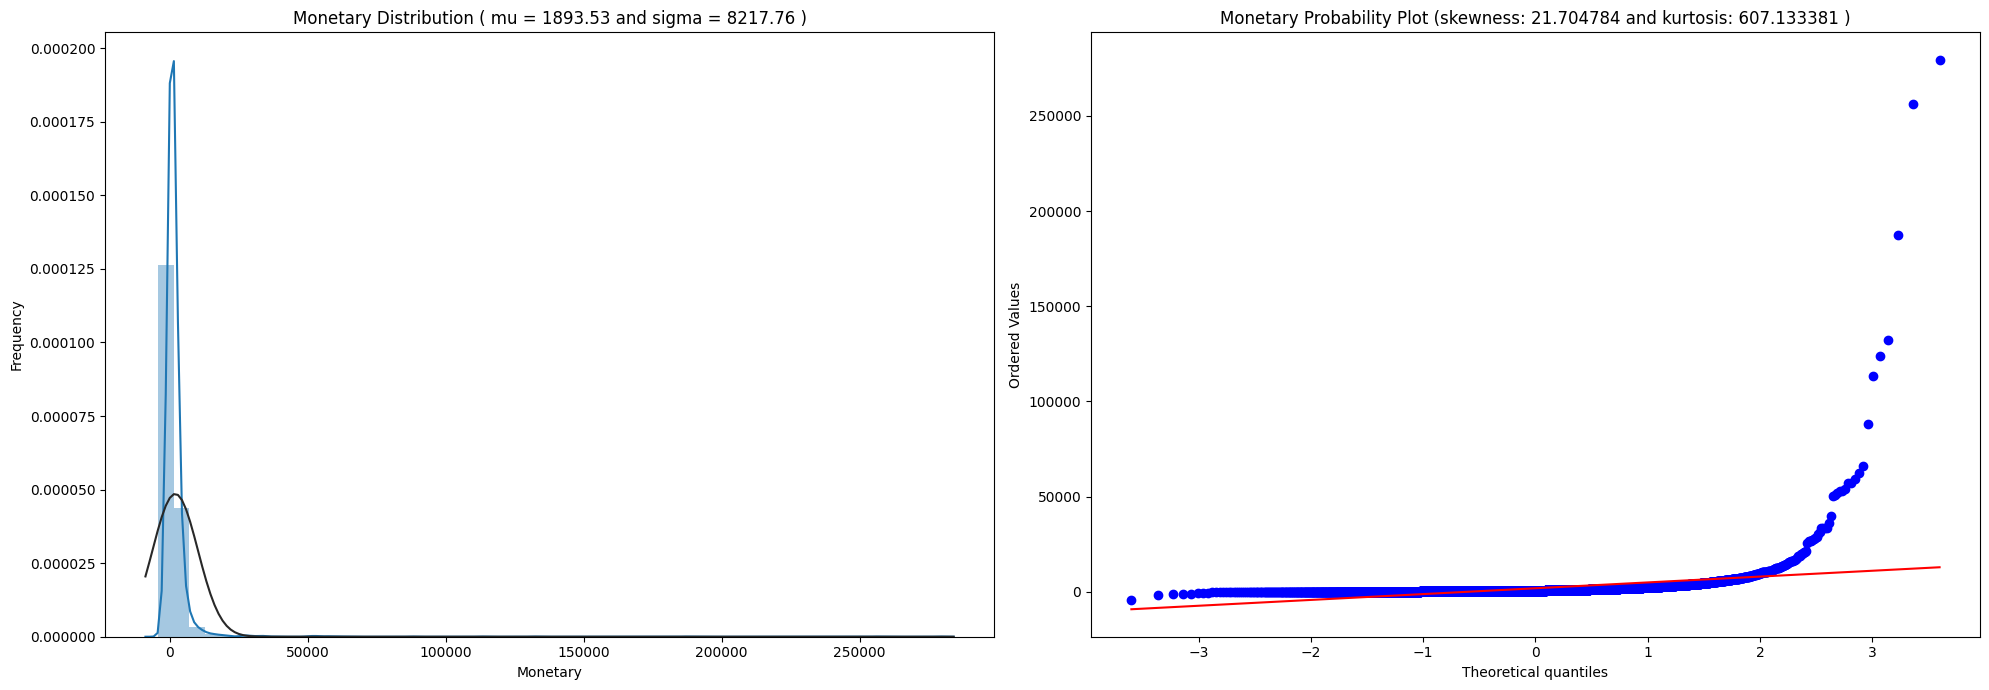

In [56]:
# **TO-DO** Generate the below Monetary graphs using the QQ_plot function
QQ_plot(rfm_table['Monetary'], 'Monetary')

# **Customer Segmentation Using Quantiles**

In [58]:
# **TO-DO** Calcualte the quantils for recency, frenuency, and monetary
quantil = rfm_table[['Recency', 'Frequency', 'Monetary']].quantile(q=[0.25, 0.5, 0.75])

print(quantil)

      Recency  Frequency  Monetary
0.25    17.00       1.00    291.80
0.50    51.00       3.00    644.07
0.75   144.00       5.00   1608.34


Quantiles in General:

    0.25 Quantile (25th Percentile): This is the value below which 25% of the data falls. It’s also known as the
    first quartile.
    0.50 Quantile (50th Percentile): This is the median, the middle value of the data. Half of the data lies below
    this value.
    0.75 Quantile (75th Percentile): This is the value below which 75% of the data falls. It’s also known as the
    third quartile.

In [60]:
# Convert quantil into dict to access each value
quantil = quantil.to_dict()
print(quantil)

{'Recency': {0.25: 17.0, 0.5: 51.0, 0.75: 144.0}, 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 5.0}, 'Monetary': {0.25: 291.795, 0.5: 644.0699999999999, 0.75: 1608.335}}


    RecencyPoints Function: Assigns points to customers based on how recently they made their last purchase, giving
    higher scores (4) to more recent purchases.
    Freq_MonetaryPoints Function: Assigns points to customers based on their purchase frequency and monetary value,
    giving higher scores to more frequent and higher spending customers.
    Application: These functions are applied to the DataFrame to segment customers into quartiles for each RFM
    metric, facilitating further analysis and customer segmentation.

By applying these functions, businesses can better understand customer behavior and tailor marketing strategies accordingly, targeting different customer segments based on their RFM scores.

In [62]:
# **TO-DO** Define the recency points function
# 0-25% = 4 / 25%-50% = 3 / 50%-75% = 2 / 75%-100% = 1
def RecencyPoints(y,rfm,q):
    if y <= q['Recency'][0.25]:
        return 4
    elif y <= q['Recency'][0.5]:
        return 3
    elif y <= q['Recency'][0.75]:
        return 2
    else:
        return 1

# **TO-DO** Define the recency points function
# 0-25% = 4 / 25%-50% = 3 / 50%-75% = 2 / 75%-100% = 1
def Freq_MonetaryPoints(y,rfm,q):
    if y <= q[rfm][0.25]:
        return 1
    elif y <= q[rfm][0.5]:
        return 2
    elif y <= q[rfm][0.75]:
        return 3
    else:
        return 4

In [63]:
# Copy RFM Table
rfm_segment = rfm_table.copy()

# **TO-DO** Apply RecencyPoint and MonetaryPoints function to Calculate Recency_Quartile, Frequency_Quartile, Monetary_Quartile
rfm_segment['Recency_Quartile'] = rfm_segment['Recency'].apply(lambda y: RecencyPoints(y, 'Recency', quantil))
rfm_segment['Frequency_Quartile'] = rfm_segment['Frequency'].apply(lambda y: Freq_MonetaryPoints(y, 'Frequency', quantil))
rfm_segment['Monetary_Quartile'] = rfm_segment['Monetary'].apply(lambda y: Freq_MonetaryPoints(y, 'Monetary', quantil))
rfm_segment.set_index('CustomerID', inplace=True)

rfm_segment.head()

Recency  Frequency  Monetary  Recency_Quartile  \
CustomerID                                                   
12346           326          2      0.00                 1   
12347             3          7   4310.00                 4   
12348            76          4   1797.24                 2   
12349            19          1   1757.55                 3   
12350           311          1    334.40                 1   

            Frequency_Quartile  Monetary_Quartile  
CustomerID                                         
12346                        2                  1  
12347                        4                  4  
12348                        3                  4  
12349                        1                  4  
12350                        1                  2

RFM Classification

In [65]:
rfm_segment['RFMPoints'] = rfm_segment.Recency_Quartile.map(str)+rfm_segment.Frequency_Quartile.map(str)+rfm_segment.Monetary_Quartile.map(str)
print(rfm_segment['RFMPoints'])

CustomerID
12346    121
12347    444
12348    234
12349    314
12350    112
        ... 
18280    111
18281    111
18282    421
18283    444
18287    324
Name: RFMPoints, Length: 4372, dtype: object


In [66]:
customer_dict = {'Best Customers':'444','Loyal Customers':'344','Big Spender':'334','Almost Lost':'244','Lost Customers':'144','Recent Customers':'443','Lost Cheap Customers':'122'}
dict_segment = dict(zip( customer_dict.values(),customer_dict.keys()))

In [67]:
# Segment Customers based on RFM Points
rfm_segment['Segment'] = rfm_segment.RFMPoints.map(lambda x:dict_segment.get(x))
rfm_segment.Segment.fillna('others',inplace = True)

rfm_segment.sample(10)

/var/folders/xb/2tg9ddl94wl284px7ngj8hn40000gn/T/ipykernel_20245/3954248131.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rfm_segment.Segment.fillna('others',inplace = True)


Recency  Frequency  Monetary  Recency_Quartile  \
CustomerID                                                   
13044           292          1    560.47                 1   
14722           148          1    180.42                 1   
18112            13          2    352.69                 4   
14716            44          2    307.51                 3   
17382            66          1     65.40                 2   
12888           215          4    313.77                 1   
12826             3          8   1468.12                 4   
17053           129          2    496.38                 2   
13634            34          5   1547.36                 3   
18130             9          4   1045.74                 4   

            Frequency_Quartile  Monetary_Quartile RFMPoints           Segment  
CustomerID                                                                     
13044                        1                  2       112            others  
14722                        1                  1       111            others  
18112                        2                  2       422            others  
14716                        2                  2       322            others  
17382                        1                  1       211            others  
12888                        3                  2       132            others  
12826                        4                  3       443  Recent Customers  
17053                        2                  2       222            others  
13634                        3                  3       333            others  
18130                        3                  3       433            others

In [68]:
# **TO-DO** Display Best Customers whose recency, frequency as well as monetary attributes are the highest.
best_customers = rfm_segment[rfm_segment['RFMPoints'] == '444']
best_customers = best_customers[[
    'Recency', 'Frequency', 'Monetary',
    'Recency_Quartile', 'Frequency_Quartile', 'Monetary_Quartile',
    'RFMPoints', 'Segment'
]]
best_customers.head(10)

Recency  Frequency  Monetary  Recency_Quartile  \
CustomerID                                                   
12347             3          7   4310.00                 4   
12359             8          6   6182.98                 4   
12362             4         13   5154.58                 4   
12381             5          6   1803.96                 4   
12388            16          6   2780.66                 4   
12395            16         15   2998.28                 4   
12417             4         12   3578.80                 4   
12423             1          9   1849.11                 4   
12433             1          7  13375.87                 4   
12437             2         19   4896.66                 4   

            Frequency_Quartile  Monetary_Quartile RFMPoints         Segment  
CustomerID                                                                   
12347                        4                  4       444  Best Customers  
12359                        4                  4       444  Best Customers  
12362                        4                  4       444  Best Customers  
12381                        4                  4       444  Best Customers  
12388                        4                  4       444  Best Customers  
12395                        4                  4       444  Best Customers  
12417                        4                  4       444  Best Customers  
12423                        4                  4       444  Best Customers  
12433                        4                  4       444  Best Customers  
12437                        4                  4       444  Best Customers

In [69]:
# **TO-DO** Display Big Spenders
big_spenders = rfm_segment[rfm_segment['RFMPoints'] == '334']

big_spenders = big_spenders[[
    'Recency', 'Frequency', 'Monetary',
    'Recency_Quartile', 'Frequency_Quartile', 'Monetary_Quartile',
    'RFMPoints', 'Segment'
]]

big_spenders.head()

Recency  Frequency  Monetary  Recency_Quartile  \
CustomerID                                                   
12380            22          5   2720.56                 3   
12407            50          5   1708.12                 3   
12432            43          5   5059.32                 3   
12444            22          5   5005.46                 3   
12449            23          4   4067.29                 3   

            Frequency_Quartile  Monetary_Quartile RFMPoints      Segment  
CustomerID                                                                
12380                        3                  4       334  Big Spender  
12407                        3                  4       334  Big Spender  
12432                        3                  4       334  Big Spender  
12444                        3                  4       334  Big Spender  
12449                        3                  4       334  Big Spender

In [70]:
# **TO-DO** Display Almost Lost who's recency is very low
almost_lost = rfm_segment[rfm_segment['RFMPoints'] == '244']

almost_lost = almost_lost[[
    'Recency', 'Frequency', 'Monetary',
    'Recency_Quartile', 'Frequency_Quartile', 'Monetary_Quartile',
    'RFMPoints', 'Segment'
]]

almost_lost.head()

Recency  Frequency  Monetary  Recency_Quartile  \
CustomerID                                                   
12409            79          7  11056.93                 2   
12455            74          6   2466.86                 2   
12457            59         12   1917.78                 2   
12520            80          6   2582.51                 2   
12637            68         10   5934.25                 2   

            Frequency_Quartile  Monetary_Quartile RFMPoints      Segment  
CustomerID                                                                
12409                        4                  4       244  Almost Lost  
12455                        4                  4       244  Almost Lost  
12457                        4                  4       244  Almost Lost  
12520                        4                  4       244  Almost Lost  
12637                        4                  4       244  Almost Lost

In [71]:
# **TO-DO** DisplayLost customers that don't need attention whose recency, frequency as well as monetary values are low
lost_customers = rfm_segment[rfm_segment['RFMPoints'] == '144']

lost_customers = lost_customers[[
    'Recency', 'Frequency', 'Monetary',
    'Recency_Quartile', 'Frequency_Quartile', 'Monetary_Quartile',
    'RFMPoints', 'Segment'
]]

lost_customers.head()

Recency  Frequency  Monetary  Recency_Quartile  \
CustomerID                                                   
12383           185          6   1839.31                 1   
12980           156         12   7092.06                 1   
13093           268         13   7741.47                 1   
15235           218         12   2247.51                 1   
15379           170          8   3631.89                 1   

            Frequency_Quartile  Monetary_Quartile RFMPoints         Segment  
CustomerID                                                                   
12383                        4                  4       144  Lost Customers  
12980                        4                  4       144  Lost Customers  
13093                        4                  4       144  Lost Customers  
15235                        4                  4       144  Lost Customers  
15379                        4                  4       144  Lost Customers

In [72]:
# **TO-DO** Display loyal customers whose purchase frequency is high
loyal_customers = rfm_segment[rfm_segment['RFMPoints'] == '344']

loyal_customers = loyal_customers[[
    'Recency', 'Frequency', 'Monetary',
    'Recency_Quartile', 'Frequency_Quartile', 'Monetary_Quartile',
    'RFMPoints', 'Segment'
]]

loyal_customers.head()

Recency  Frequency  Monetary  Recency_Quartile  \
CustomerID                                                   
12408            33          9   2842.57                 3   
12415            25         26 123725.45                 3   
12428            26         12   7877.20                 3   
12431            36         18   6348.89                 3   
12472            31         13   6229.48                 3   

            Frequency_Quartile  Monetary_Quartile RFMPoints          Segment  
CustomerID                                                                    
12408                        4                  4       344  Loyal Customers  
12415                        4                  4       344  Loyal Customers  
12428                        4                  4       344  Loyal Customers  
12431                        4                  4       344  Loyal Customers  
12472                        4                  4       344  Loyal Customers

In [73]:
# **TO-DO** Display customers that you must retain are those whose monetary and frequency was high but recency reduced quite a lot recently
must_retain = rfm_segment[rfm_segment['RFMPoints'] == '244']

must_retain = must_retain[[
    'Recency', 'Frequency', 'Monetary',
    'Recency_Quartile', 'Frequency_Quartile', 'Monetary_Quartile',
    'RFMPoints', 'Segment'
]]

must_retain.head()

Recency  Frequency  Monetary  Recency_Quartile  \
CustomerID                                                   
12409            79          7  11056.93                 2   
12455            74          6   2466.86                 2   
12457            59         12   1917.78                 2   
12520            80          6   2582.51                 2   
12637            68         10   5934.25                 2   

            Frequency_Quartile  Monetary_Quartile RFMPoints      Segment  
CustomerID                                                                
12409                        4                  4       244  Almost Lost  
12455                        4                  4       244  Almost Lost  
12457                        4                  4       244  Almost Lost  
12520                        4                  4       244  Almost Lost  
12637                        4                  4       244  Almost Lost

# **RFM Distribution Visualization**

/var/folders/xb/2tg9ddl94wl284px7ngj8hn40000gn/T/ipykernel_20245/318202995.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_table.Recency,color='Red',axlabel='Recency',ax=axes[0])
/var/folders/xb/2tg9ddl94wl284px7ngj8hn40000gn/T/ipykernel_20245/318202995.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

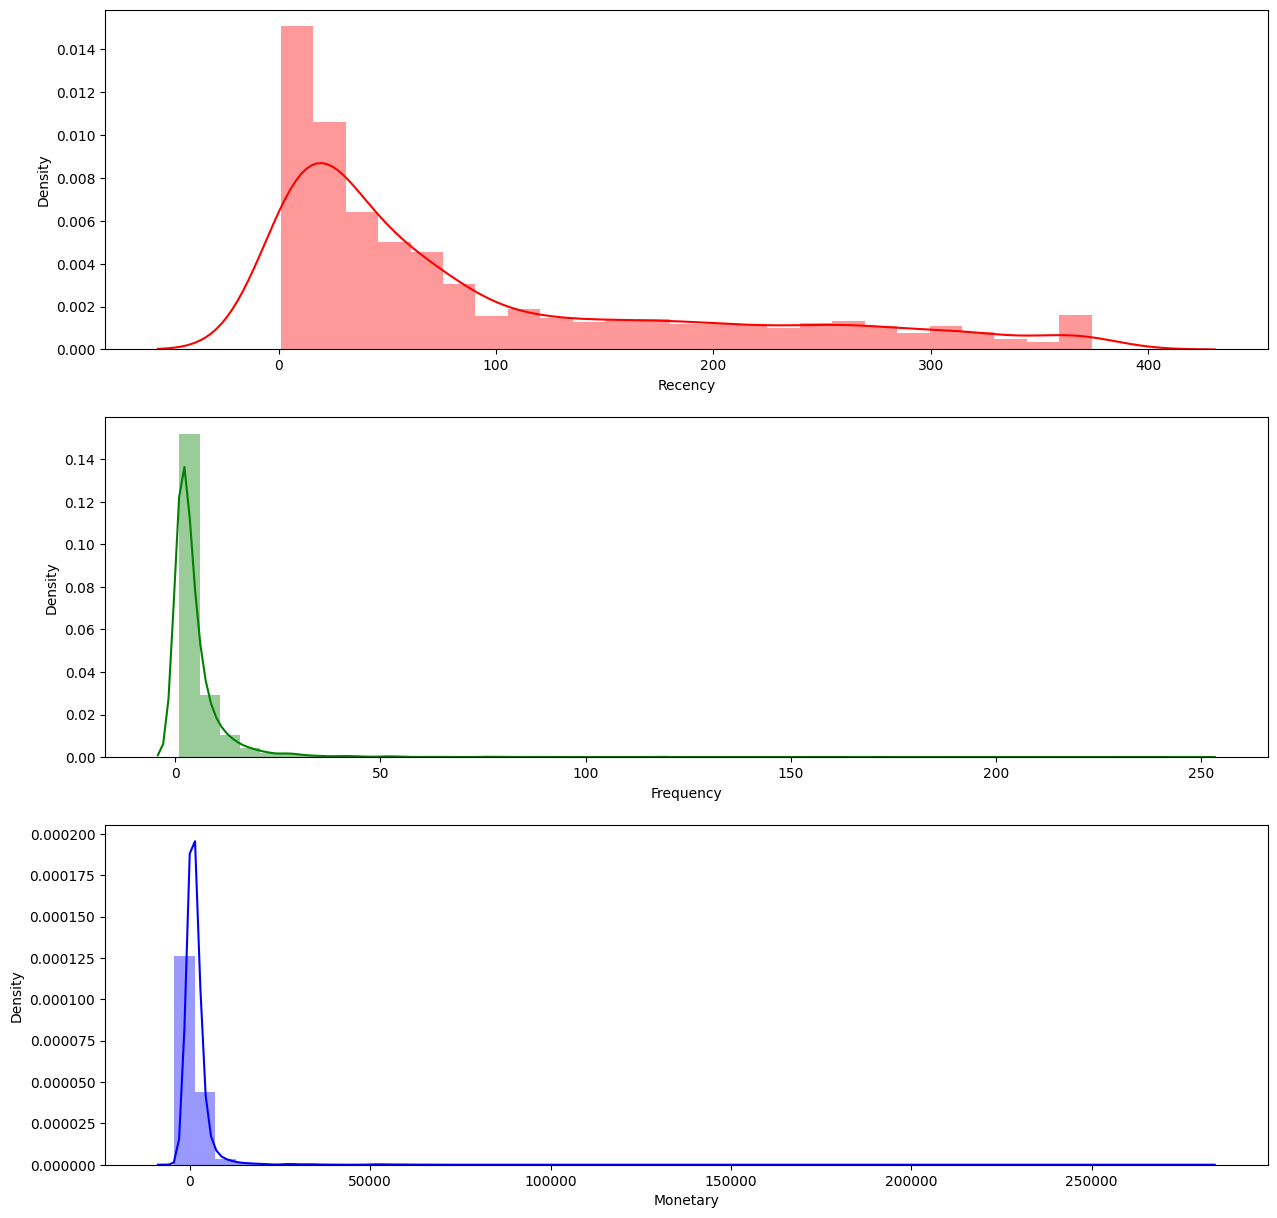

In [75]:
fig,axes = plt.subplots(3,1,figsize=(15,15))
sns.distplot(rfm_table.Recency,color='Red',axlabel='Recency',ax=axes[0])
sns.distplot(rfm_table.Frequency,color='Green',axlabel='Frequency',ax=axes[1])
sns.distplot(rfm_table.Monetary,color='Blue',axlabel='Monetary',ax=axes[2])
plt.show()

In [76]:
rfm_table.describe()

CustomerID  Recency  Frequency  Monetary
count     4372.00  4372.00    4372.00   4372.00
mean     15299.68    92.58       5.08   1893.53
std       1722.39   100.77       9.34   8218.70
min      12346.00     1.00       1.00  -4287.63
25%      13812.75    17.00       1.00    291.80
50%      15300.50    51.00       3.00    644.07
75%      16778.25   144.00       5.00   1608.34
max      18287.00   374.00     248.00 279489.02

In [77]:
scaled_rfm = rfm_table.copy()
scaled_rfm.Monetary = rfm_table.Monetary + abs(rfm_table.Monetary.min())+1
scaled_rfm.Recency = rfm_table.Recency + abs(rfm_table.Recency.min())+1
scaled_rfm.describe()

CustomerID  Recency  Frequency  Monetary
count     4372.00  4372.00    4372.00   4372.00
mean     15299.68    94.58       5.08   6182.16
std       1722.39   100.77       9.34   8218.70
min      12346.00     3.00       1.00      1.00
25%      13812.75    19.00       1.00   4580.43
50%      15300.50    53.00       3.00   4932.70
75%      16778.25   146.00       5.00   5896.97
max      18287.00   376.00     248.00 283777.65

/var/folders/xb/2tg9ddl94wl284px7ngj8hn40000gn/T/ipykernel_20245/1296018613.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal_.Recency , color="Red", ax=axes[0], axlabel='Recency')
/var/folders/xb/2tg9ddl94wl284px7ngj8hn40000gn/T/ipykernel_20245/1296018613.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

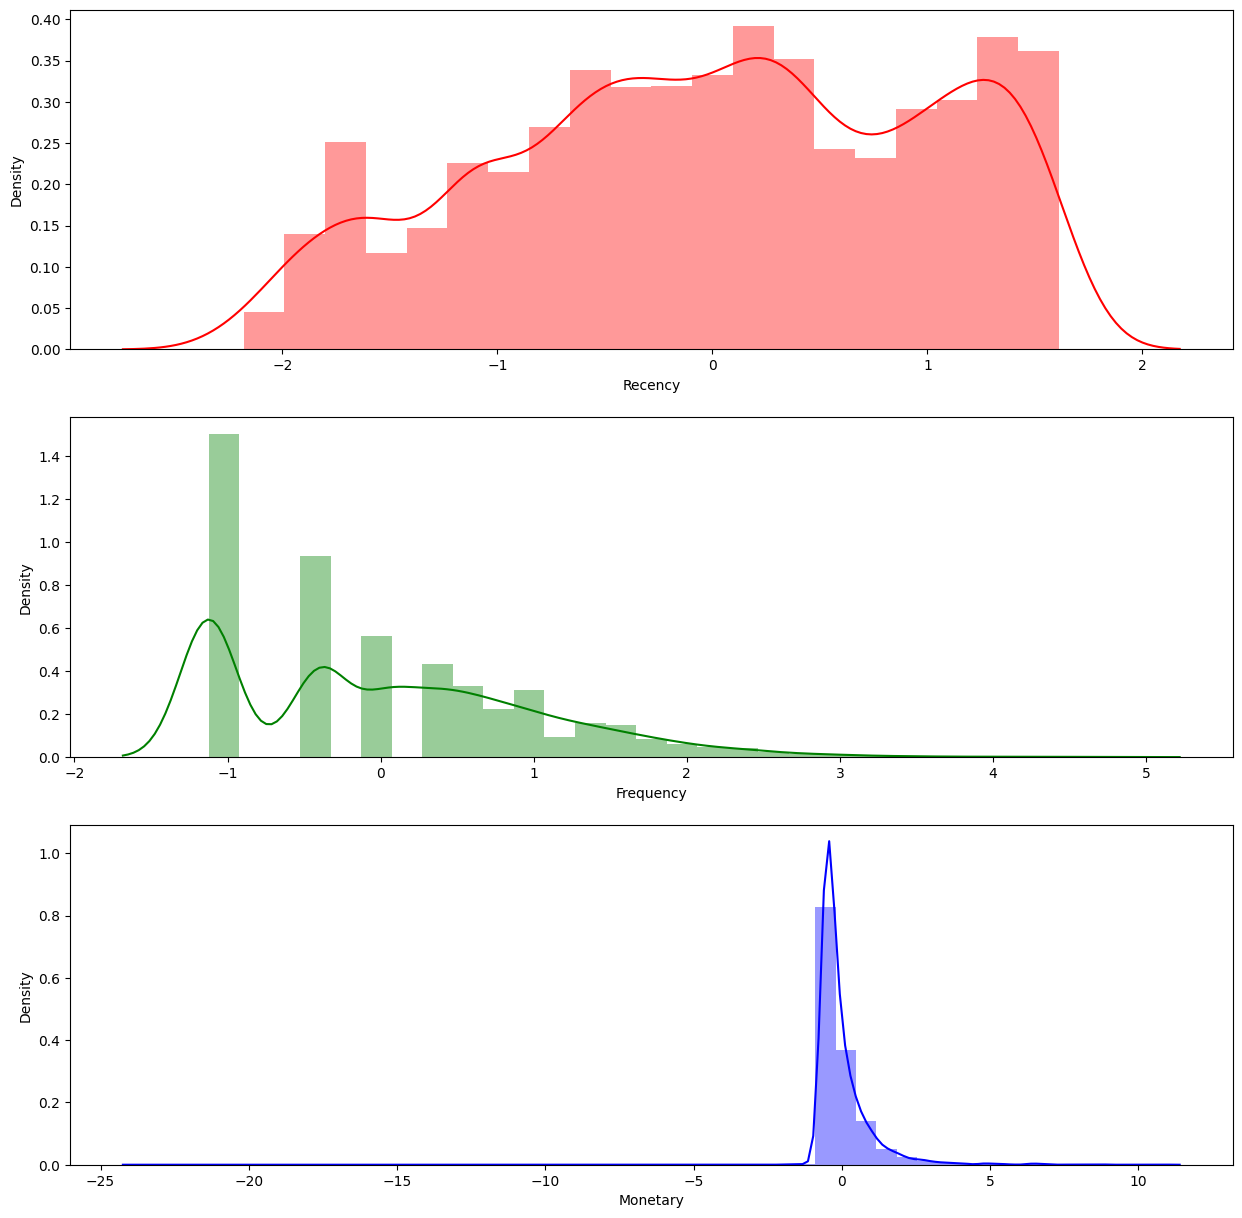

In [78]:
import numpy as np

from sklearn.preprocessing import StandardScaler

log_df = np.log(scaled_rfm)
scal = StandardScaler()
normal_ = scal.fit_transform(log_df)
normal_ = pd.DataFrame(data=normal_,index = rfm_table.index,columns=rfm_table.columns)

fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(normal_.Recency , color="Red", ax=axes[0], axlabel='Recency')
sns.distplot(normal_.Frequency , color="Green", ax=axes[1], axlabel='Frequency')
sns.distplot(normal_.Monetary , color="Blue", ax=axes[2], axlabel='Monetary')
plt.show()